<font color='seagreen'>


# Week 6 -- Feedbacks in Planetary Atmospheres

*Please finish and submit this project before the start of class on 11 October 2017.*


<font color='seagreen'>
### Q1: Ice-albedo Hysteresis

This question, which comes from Pierrehumbert's book, explores the ice-albedo feedback for a planet kind of like Earth. Let's assume a cartoon model where the Bond albedo $A_{\rm B}$ of the planet is the following function of temperature:

$$ A_{\rm B}(T) = \left\{\begin{array}{c} 
A_{\rm i} & {\rm for}~T\le T_{\rm i} \\
A_{\rm o} + (A_{\rm i} - A_{\rm o}) \frac{(T-T_{\rm o})^2}{(T_{\rm i}-T_{\rm o})^2} & {\rm for}~T_{\rm i}\lt T \lt T_{\rm o}\\
A_{\rm ocean} & {\rm for}~T\ge T_{\rm o} \\\end{array}\right. $$


If the surface temperature $T$ is below some threshold $T_{\rm i}$, the entire planet is covered in ice and has an albedo of $A_{\rm i} = 0.6$. On the other hand, if the surface temperature is above some threshold $T_{\rm o}$ then the planet is completely thawed and has an albedo characteristic of the open ocean $A_{\rm o} = 0.1$. In between, there's a transition that starts rapidly as we start to thaw the equator (with a big impact on global albedo) and then tapers off as only the poles remain to be thawed (with less impact on global albedo).

For thinking about the global energy balance, it will be useful to have a way to estimate the wavelength-integrated Outgoing Longwave Radiation (OLR) as a function of surface temperature $T$. If there were no atmosphere, this would simply be $OLR(T) = \sigma_{\rm SB} T^4$. However, calculations with a complete real gas radiation simulation indicate that, for a generally Earth-like atmosphere with a $CO_2$ concentration of 300 ppmv and an atmosphere that follows the moist adiabat, a reasonable fit to the actual $OLR(T)$ curve in the range of $220~K$ to $310~K$ is the linear fit

$$OLR(T) = a + b\times(T-220)$$

where $a = 113~W/m^2$ and $b = 2.177~W/m^2/K$. Let's put these ingredients together:

+ Compute the ice-albedo hysteresis diagram we saw in class, giving the set of surface temperatures $T$ that are possible for a given bolometric flux hitting the planet $S$ (also known as the solar constant, which is $1360~W/m^2$ for modern Earth). Note that there is a simple trick for getting this bifurcation plot. The equation determining the equilibrium is $\frac{1}{4}S[1-A_{\rm B}(T)] = OLR(T)$. Instead of specifying $S$ and finding the $T$ that satisfy the equation, rewrite the equation as
$$S = 4\frac{OLR(T)}{1-A_{\rm B}(T)}$$
Now, if we call the right hand side $G(T)$, then $G(T)$ gives the unique value of $S$ which supports the surface temperature $T$. Hence, to get to the bifurcation diagram, you can just plot $G(T)$ and then turn it sideways. 

+ Based on your calculations, if $CO_2$ were held constant how much would $S$ have to be reduced from its modern value before Earth was forced to fall into an inevitable Snowball state? Assuming a circular orbit, how far out from the modern Sun would you have to move Earth to achieve this solar constant? Conversely, how close to the Sun would you have to place the Earth before a Snowball state became impossible? (Note that the assumption of constant $CO_2$ is unrealistic, since tectonically active planets with water can adjust their $CO_2$ in reponse to changes in the solar constant via the carbonate-silicate cycle.

+ How would the behavior of this system be different if ice were dark and open water were very reflective ($A_{\rm i} = 0.1$, $A_{\rm o} = 0.6$)? 

+ Describe, qualitatively, how feedback from the carbonate-silicate cycle could prevent Earth from staying in a permanent snowball state.

+ The file `albedoofsnow.txt` contains the reflectivity of snow as a function of wavelength, across visible and near-infrared wavelengths. The data come from the [USGS Spectral Library](https://speclab.cr.usgs.gov/spectral-lib.html). Using the albedo data, what fraction of incoming energy from a $5800~K$ Sun-like star would this snow reflect? What fraction of incoming energy from a $3000~K$ M dwarf star would this snow reflect? (It's OK to integrate only over those wavelengths where you have data for the albedo of snow.) Based on your results, do you expect the ice-albedo feedback (and the threat of Snowball Earth) to be stronger or weaker for planets around cooler stars?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy import units as u
from astropy import constants as const

sns.set_style('darkgrid')
sns.set_context('talk')

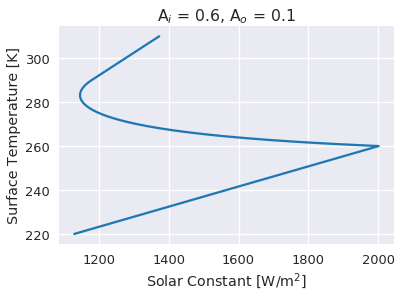

282.72727272727275 K 1146.5789262735998 W / m2 1.0895662515028086 AU
To reach the snowball state, the Earth would have to receive a solar constant of 1146.5789262735998 W / m2
This would require migrating outward to about 1.0896 AU 

310.0 K 1373.0222222222221 W / m2 0.9956732452304302 AU
To prevent the snowball state, the Earth would have to receive a solar constant of 1373.0222222222221 W / m2
This would require migrating inward to about 0.9957 AU


In [42]:
def albedo_func(temp_arr, temp_i=260.*u.K, temp_o=290.0*u.K, a_i=0.6, a_o = 0.1):
    return np.piecewise(temp_arr,
                        [temp_arr <= temp_i, ((temp_i < temp_arr) & (temp_arr < temp_o)), temp_arr >= temp_o],
                        [a_i, lambda temp: a_o + ((a_i - a_o)*(temp - temp_o)**2.0)/((temp_i - temp_o)**2.0), a_o])

def olr_func(temp_arr, a=113.0*(u.W/(u.m**2.0)), b=2.177*(u.W/(u.K*(u.m**2.0))), temp_const=220.0*u.K):
    return a + b*(temp_arr - temp_const)

def solar_const_func(temp_arr, olr_params=[], albedo_params=[]):
    if len(albedo_params) == 0:
        albedo_term = albedo_func(temp_arr)
    else:
        albedo_term = albedo_func(temp_arr,
                                  albedo_params[0],
                                  albedo_params[1],
                                  albedo_params[2],
                                  albedo_params[3])
    if len(olr_params) == 0:
        olr_term = olr_func(temp_arr)
    else:
        olr_term = olr_func(temp_arr, olr_params[0], olr_params[1], olr_params[2])
    
    denom = 1.0 - albedo_term
    return 4.0*olr_term/denom

temp_arr = np.linspace(220.0, 310.0, 100)*u.K
solar_1 = solar_const_func(temp_arr)

plt.xlabel(r'Solar Constant [W/m$^2$]')
plt.ylabel(r'Surface Temperature [K]')
plt.plot(solar_1, temp_arr)
plt.title(r'A$_i$ = 0.6, A$_o$ = 0.1')
plt.show()

temp_snowball = temp_arr[np.where(temp_arr > 260.0*u.K)][np.argmin(solar_1[np.where(temp_arr > 260.0*u.K)])]
solar_snowball = solar_1[np.where(solar_1 == solar_1[np.where(temp_arr == temp_snowball)])][0]
axis_snowball = np.sqrt(const.L_sun/(4.0*np.pi*solar_snowball)).to(u.AU)
print(temp_snowball, solar_snowball, axis_snowball)
print("To reach the snowball state, the Earth would have to receive a solar constant of", solar_snowball)
print('This would require migrating outward to about', "{:.4f}".format(axis_snowball), '\n')

temp_slush = np.max(temp_arr)
solar_slush = solar_1[np.where(solar_1 == solar_1[np.where(temp_arr == temp_slush)])][0]
axis_slush = np.sqrt(const.L_sun/(4.0*np.pi*solar_slush)).to(u.AU)
print(temp_slush, solar_slush, axis_slush)
print("To prevent the snowball state, the Earth would have to receive a solar constant of", solar_slush)
print('This would require migrating inward to about', "{:.4f}".format(axis_slush))

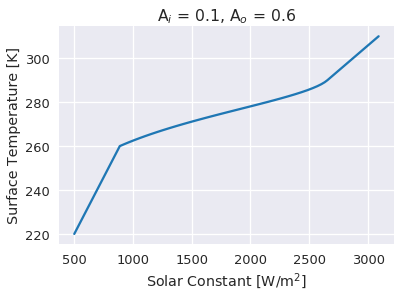

260.0 K 889.2444444444443 W / m2 1.2372146109657824 AU
To reach the snowball state, the Earth would have to receive a solar constant of 889.2444444444443 W / m2
This would require migrating outward to about 1.2372 AU 

310.0 K 3089.2999999999997 W / m2 0.6637821634869535 AU
To prevent the snowball state, the Earth would have to receive a solar constant of 3089.2999999999997 W / m2
This would require migrating inward to about 0.6638 AU


In [44]:
solar_2 = solar_const_func(temp_arr, albedo_params=[260.0*u.K, 290.0*u.K, 0.1, 0.6])

plt.xlabel(r'Solar Constant [W/m$^2$]')
plt.ylabel(r'Surface Temperature [K]')
plt.plot(solar_2, temp_arr)
plt.title(r'A$_i$ = 0.1, A$_o$ = 0.6')
plt.show()

temp_snowball = 260.0*u.K
solar_snowball = solar_2[np.where(solar_2 == solar_2[np.where(temp_arr == temp_snowball)])][0]
axis_snowball = np.sqrt(const.L_sun/(4.0*np.pi*solar_snowball)).to(u.AU)
print(temp_snowball, solar_snowball, axis_snowball)
print("To reach the snowball state, the Earth would have to receive a solar constant of", solar_snowball)
print('This would require migrating outward to about', "{:.4f}".format(axis_snowball), '\n')

temp_slush = np.max(temp_arr)
solar_slush = solar_2[np.where(solar_2 == solar_2[np.where(temp_arr == temp_slush)])][0]
axis_slush = np.sqrt(const.L_sun/(4.0*np.pi*solar_slush)).to(u.AU)
print(temp_slush, solar_slush, axis_slush)
print("To prevent the snowball state, the Earth would have to receive a solar constant of", solar_slush)
print('This would require migrating inward to about', "{:.4f}".format(axis_slush))

<font color='seagreen'>
### Q2: Explore Topics for Your Semester Project!

For your semester project for ASTR5810, I ask that you please pick a topic that interests you and do a short research project on it. These projects do not have to be original -- it can be remaking a plot or analysis from another paper with only slight tweaks. You will write up a brief report describing your project and present a brief talk on your project during the last week of class. 

This week, I want you to (a) brainstorm a topic for this project, (b) identify one paper or resource that would be relevant to your project, and (c) write one short paragraph describing your idea. The following resources might be useful:

+ [NASA Astrophysics Data System](https://ui.adsabs.harvard.edu) is the resource to turn to for searching for papers. Pretty much all astrophysics *and* planetary science journal articles are databased here. If you're interested in a particular topic, searching for keywords or phrases in abstracts or titles could be a good place to start. Sorting the search results by citation count can be a fast (but not necessarily complete!) way to identify important papers on your topic. Starting from one paper, you can also look at the papers that cite that paper ("citations") or are cited by that paper ("references"). 
+ [NASA Planetary Data System](https://pds.nasa.gov) contains a huge resository of datasets from Solar System planetary missions. If you're interested in playing with real data from our local planets, explore this database! The [ESA Planetary Science Archive](https://archives.esac.esa.int/psa/) also has lots of cool planetary datasets. 
+ [NASA Earth Observations](https://neo.sci.gsfc.nasa.gov) allows you to download aggregated data from Earth observing satellites. It also has snazzy interactive online tools for plotting and comparing datasets, across time and across different measurements. [NOAA Climate Data Online](https://www.ncdc.noaa.gov/cdo-web/) has data related to historical climate on Earth, resources for interacting with those data, and links to other Earth data sources.
+ [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu) is a decent source for bulk information on planetary systems. It might be a good place to start if you want to think about modeling some aspects of exoplanet atmospheres. It has a very small collection of spectra probing exoplanet atmospheres available.
+ Many other resources exist out there on the internet. Please feel free to poke around [wikipedia](https://www.wikipedia.org) is a terrible resource for peer reviewed science and real datasets. However, it can be a wonderful resource for initial exploration of topics and for finding links to papers and datasets!
+ [I am happy to help](https://astr5810-f17.slack.com). If you want to explore a particular topic but don't know where to begin, please ask!